<a href="https://colab.research.google.com/github/malick741/MACHINE-LEARNING/blob/main/Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



PREDICTION CORONA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'

In [3]:
data=pd.read_csv(url,index_col=0, encoding = "ISO-8859-1")
df=data.copy()
pd.set_option('display.max_columns',df.shape[1])


In [4]:
#suppression des colonnes inutiles 
df=df[df.columns[df.isnull().sum()/df.shape[0]<0.90 ]] 

In [5]:
df.head(5)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


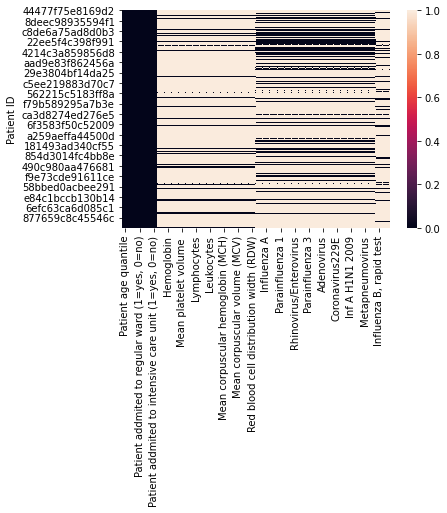

In [6]:
sns.heatmap(df.isnull())

In [7]:
maladie=df[df.columns[df.isnull().sum()/df.shape[0]==0]]
sang= df[df.columns[df.isnull().sum()/df.shape[0]>0.89]& df.columns[df.isnull().sum()/df.shape[0]<0.90]]
viral= df[df.columns[df.isnull().sum()/df.shape[0]>0.75]& df.columns[df.isnull().sum()/df.shape[0]<0.86]]
virals=viral.drop(['Influenza A'	,'Influenza B',	'Parainfluenza 1'	],axis=1)
influenza= df[df.columns[df.isnull().sum()/df.shape[0]==0.854713]]

In [92]:
virals['SARS-Cov-2 exam result']=maladie['SARS-Cov-2 exam result']
sang['SARS-Cov-2 exam result']=maladie['SARS-Cov-2 exam result']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [234]:
Positive=df[df['SARS-Cov-2 exam result']=='positive']
Negative=df[df['SARS-Cov-2 exam result']=='negative']

In [247]:
positive=Positive.dropna()
negative=Negative.dropna()
negative=negative.sample(positive.shape[0])


frames = [positive, negative, ]

result = pd.concat(frames)


,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9d7c293a6773d6a,14,positive,0,0,0,-0.312811,-0.648900,-0.027502,-0.101517,-0.656101,-0.099557,-1.448681,-0.968407,-0.529226,0.021361,0.175837,0.807138,1.513128,0.347948,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2a5db9bbb45109f,14,positive,0,0,0,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
fd44054b4168e33,7,positive,0,0,0,0.076295,0.290940,-0.655593,0.459449,-0.039039,-1.080398,0.841616,-0.770829,0.081693,0.544077,-0.371974,0.166192,1.381812,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
17319c86ff7db04,18,positive,0,0,0,-0.930802,-1.150148,0.035307,-0.325903,-1.661031,-0.884230,-1.149948,-0.823702,1.303529,1.275878,0.260116,2.109059,0.909074,0.259492,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
30cb1119e01ee90,11,positive,0,1,0,1.564053,1.794683,-0.730964,0.122869,1.459542,-1.054811,1.140354,-0.539857,-0.223767,0.334989,-0.498393,-0.174311,0.410073,-0.978899,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
61dd2fab8e61a9e,12,positive,1,0,0,0.762952,0.478908,-0.555098,0.122869,1.318499,0.574237,-0.851210,-1.063022,0.387152,-1.442245,-0.540532,-1.195818,0.199968,0.967144,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2136a024e2b5c9c,12,positive,1,0,0,-0.381476,-0.335620,-1.245998,-0.774677,-0.303494,0.710702,0.144572,-1.188248,0.387152,-0.083183,0.175837,-0.134251,0.987864,-0.448160,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
e5aa8b867b628f4,15,positive,0,1,0,-0.244145,-0.210308,-0.567660,0.683835,-0.444537,0.710702,0.044991,-1.346867,-0.223767,0.439533,-0.709090,0.446606,0.830284,-0.536617,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_de

##                                                           **PREPROCESSING**

In [265]:
from sklearn.model_selection import train_test_split,learning_curve


In [282]:
trainset,testset=train_test_split(result,test_size=0.2,random_state=0)

In [283]:
code={'negative':0,
    'positive':1,
    'not_detected':0,
    'detected': 1
}
def encodage(df):
  for col in df.select_dtypes('object').columns:
    df[col]=df[col].map(code)
  return df

In [284]:
def imputation(df):
  df=df.fillna(df.mean())
  return df.dropna()

In [285]:
def preprocess(df):
  df=encodage(df)
  df=imputation(df)

  X=df.drop('SARS-Cov-2 exam result',axis=1)
  Y=df['SARS-Cov-2 exam result']
  return X,Y

In [286]:
x_train,y_train=preprocess(trainset)
x_test,y_test=preprocess(testset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##                                                            **MODELISATION**

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [287]:
#model=  SVC(random_state=0)
model=DecisionTreeClassifier(random_state=0)

In [288]:
params={'criterion':['gini'],'max_features':[2,3,4,5]}
grid=GridSearchCV(model,param_grid=params,cv=5,scoring='f1')

# EVALUATION DE MODEL

In [223]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [289]:
def evaluate(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)

  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

  N,train_score,val_score=learning_curve(model,x_train,y_train,scoring='f1',train_sizes=np.linspace(0.1,1,10),cv=4)
  plt.plot(N,train_score.mean(axis=1),label='TRAIN')
  plt.plot(N,val_score.mean(axis=1),label='validation')
  plt.legend()

[[1 2]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=1.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=3.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

  FitFailedWarn

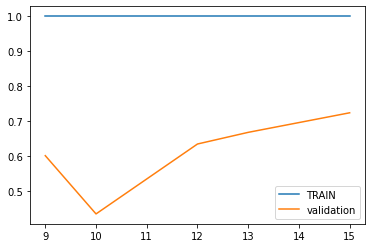

In [290]:
evaluate(grid)

In [196]:
grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

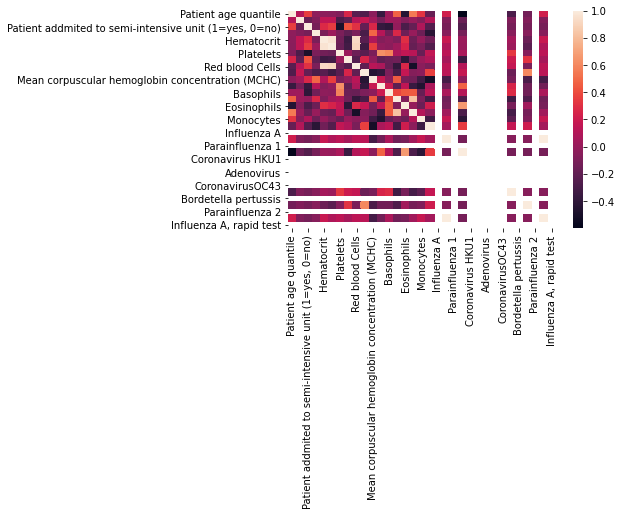

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


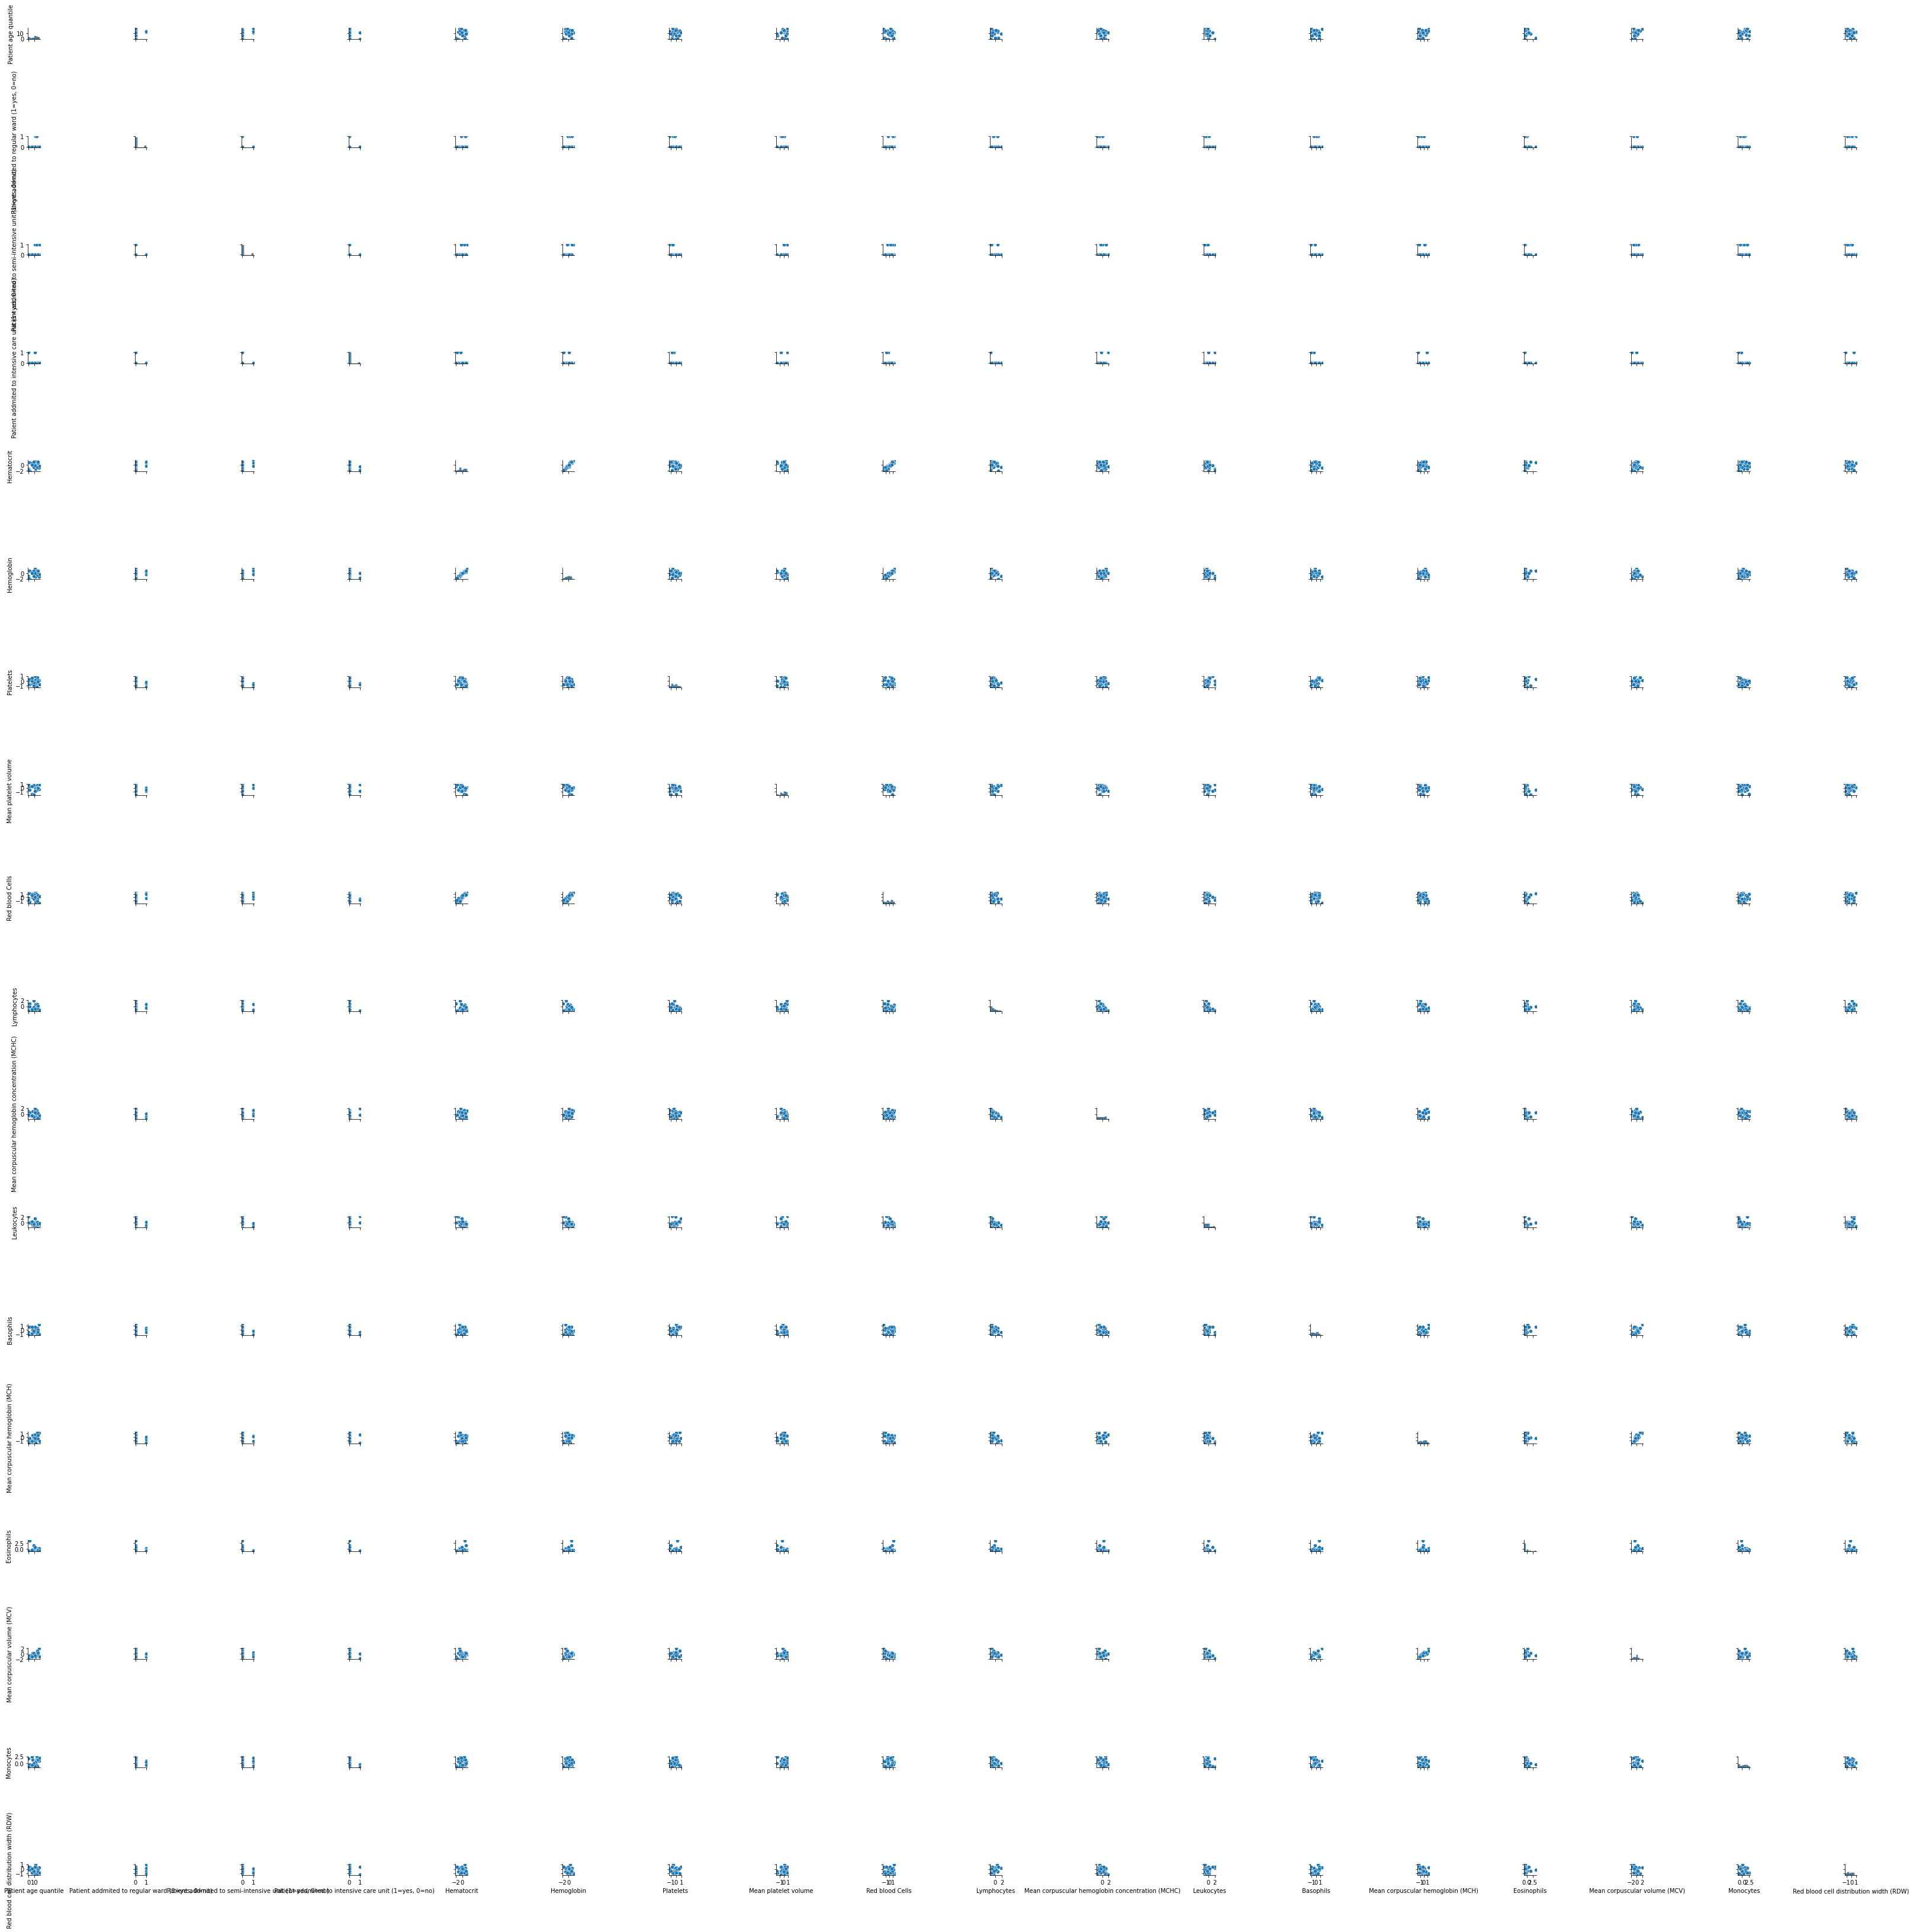